### Part A

In [16]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

%matplotlib inline

In [34]:
df = pd.read_csv(r'CE802_P3_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-282.00,54.09,2.91,-7.73,High,47.41,12423.04,191.12,6.62,-346.47,-72.45,6,-28.83,-2846.73,2642.96,-217.64,-1657.65,15204.51,-46.06,-1079.05,Europe,113.67,36.86,-34.67,46.41,-30.96,-2055.99,10,-2272.86,-1363.82,-52170.42,-16.99,651.76,51.90,-2399.64,-187.80,254.01
1,-170.84,41.25,8.91,-14.83,High,17.62,6568.94,250.88,4.50,-507.72,-71.67,5,-29.76,-2320.62,2205.90,-151.28,1840.74,16776.48,-39.56,-1342.03,USA,225.66,45.84,112.93,87.35,-22.74,-1367.33,10,-2279.49,-1104.30,-19889.10,95.38,93.58,46.82,-1814.96,-374.19,651.88
2,-224.08,46.02,17.10,-9.35,Medium,90.80,14669.76,76.66,1.62,-225.57,-82.38,3,-25.86,-1165.32,2156.14,-306.40,10091.43,4317.33,-36.76,-943.65,UK,109.38,47.64,-64.98,169.95,-46.92,-1590.52,8,-1270.38,-1508.36,-27407.16,121.09,735.53,36.08,-1955.82,-447.06,2535.19
3,-221.68,42.90,2.28,-6.76,Medium,25.61,12171.30,92.94,1.70,-714.57,-73.65,3,-8.94,-3497.46,2363.62,-280.40,5264.43,-8449.29,-40.12,-993.92,USA,19.11,72.24,335.95,161.67,-46.18,-6196.65,10,-1345.74,-988.61,-29092.83,112.39,735.53,43.48,-1688.78,-174.57,706.24
4,-300.56,52.38,11.67,-5.39,Very low,59.93,15667.08,155.22,45.84,-248.04,-58.08,5,-11.85,-2212.98,2404.00,-270.59,-1794.24,1167.90,-36.28,-1291.56,Europe,116.46,26.94,41.57,111.43,-32.84,-2545.14,6,372.06,-1385.47,-47932.59,135.37,470.91,20.48,-2391.94,-162.60,1155.66


In [35]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   object 
 21  F22     1500 non-null   float64
 22  

In [37]:
df['F5'] = pd.factorize(df['F5'])[0]
df['F12'] = pd.factorize(df['F12'])[0]
df['F21'] = pd.factorize(df['F21'])[0]
df['F28'] = pd.factorize(df['F28'])[0]


df['F5'] = df['F5'].astype(float)
df['F12'] = df['F12'].astype(float)
df['F21'] = df['F21'].astype(float)
df['F28'] = df['F28'].astype(float)





In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [39]:
df.describe() #to get statistical info of the data frame

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-234.036653,47.112540,11.494480,9.214673,1.980000,36.362440,11485.690133,181.113000,147.677373,-388.034240,-74.761840,3.029333,-22.222660,-2240.241820,2252.470693,-228.068213,-1222.447800,5644.91096,-42.738040,-1236.625480,1.523333,108.590020,45.376413,-183.103687,106.205060,-25.261120,-2713.982227,2.755333,-1303.09510,-1149.054240,-33425.001400,131.296927,412.256013,38.925880,-2079.587000,-266.040200,856.493547
std,60.053084,12.644806,8.019788,29.895706,1.407926,44.360757,5949.554732,60.705946,1407.814521,129.856996,12.983768,2.160768,8.954396,1268.631888,866.528782,41.155295,9210.333946,8765.70927,5.582196,289.526864,1.113380,123.556939,8.455589,295.642000,41.107794,8.665046,2965.099702,2.392897,921.61161,297.557767,9055.633907,42.300767,293.951559,8.316926,598.512347,87.979299,1222.860406
min,-441.340000,-8.130000,0.090000,-99.320000,0.000000,-222.740000,-9609.800000,-42.720000,0.000000,-1012.860000,-145.650000,0.000000,-55.950000,-9847.140000,-2207.600000,-439.700000,-34542.810000,-27105.63000,-69.540000,-2663.020000,0.000000,-471.300000,1.820000,-1153.030000,-85.230000,-64.500000,-12960.640000,0.000000,-3881.67000,-2208.330000,-67707.240000,-95.410000,-683.660000,-10.240000,-4130.400000,-550.230000,-2685.920000
25%,-273.985000,40.800000,5.610000,-10.680000,1.000000,15.852500,7432.320000,142.180000,0.280000,-451.950000,-80.580000,1.000000,-27.997500,-2856.472500,1822.070000,-248.290000,-7424.895000,-226.06500,-45.110000,-1431.320000,1.000000,47.775000,41.365000,-380.387500,85.602500,-29.420000,-4762.332500,1.000000,-1930.37250,-1351.842500,-39169.920000,110.692500,217.127500,34.560000,-2471.240000,-327.877500,17.235000
50%,-233.440000,47.190000,9.795000,9.680000,2.000000,35.625000,11415.890000,179.970000,2.170000,-386.085000,-74.460000,2.000000,-22.305000,-2259.450000,2234.360000,-227.780000,-1419.255000,5683.99500,-41.420000,-1226.485000,2.000000,109.755000,45.330000,-190.890000,105.945000,-25.260000,-2633.445000,2.000000,-1321.69500,-1143.385000,-33527.670000,131.675000,419.420000,39.140000,-2078.270000,-264.180000,624.735000
75%,-192.320000,53.115000,15.300000,29.142500,3.000000,57.937500,15339.935000,223.695000,15.965000,-319.680000,-68.220000,4.000000,-16.012500,-1624.792500,2694.680000,-207.275000,5122.837500,11465.96250,-38.715000,-1047.510000,3.000000,175.080000,49.470000,18.665000,127.095000,-21.180000,-713.480000,4.000000,-680.22750,-948.047500,-27326.242500,152.607500,597.972500,43.400000,-1691.360000,-208.162500,1609.167500
max,-24.140000,99.900000,54.180000,106.940000,4.000000,242.130000,28618.320000,371.720000,45417.440000,157.440000,-27.030000,10.000000,4.050000,4693.920000,6339.700000,-33.870000,26301.120000,31819.02000,-35.000000,-237.720000,3.000000,706.950000,97.600000,649.970000,279.920000,19.240000,8369.020000,11.000000,1444.80000,-187.730000,-1602.000000,386.780000,1338.930000,74.980000,380.860000,19.320000,3836.440000


In [40]:
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'Target'],
      dtype='object')

In [41]:
input_features = df.drop(['Target'],axis=1)
output_features =df['Target']

In [42]:
input_features

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,-282.00,54.09,2.91,-7.73,0.0,47.41,12423.04,191.12,6.62,-346.47,-72.45,0.0,-28.83,-2846.73,2642.96,-217.64,-1657.65,15204.51,-46.06,-1079.05,0.0,113.67,36.86,-34.67,46.41,-30.96,-2055.99,0.0,-2272.86,-1363.82,-52170.42,-16.99,651.76,51.90,-2399.64,-187.80
1,-170.84,41.25,8.91,-14.83,0.0,17.62,6568.94,250.88,4.50,-507.72,-71.67,1.0,-29.76,-2320.62,2205.90,-151.28,1840.74,16776.48,-39.56,-1342.03,1.0,225.66,45.84,112.93,87.35,-22.74,-1367.33,0.0,-2279.49,-1104.30,-19889.10,95.38,93.58,46.82,-1814.96,-374.19
2,-224.08,46.02,17.10,-9.35,1.0,90.80,14669.76,76.66,1.62,-225.57,-82.38,2.0,-25.86,-1165.32,2156.14,-306.40,10091.43,4317.33,-36.76,-943.65,2.0,109.38,47.64,-64.98,169.95,-46.92,-1590.52,1.0,-1270.38,-1508.36,-27407.16,121.09,735.53,36.08,-1955.82,-447.06
3,-221.68,42.90,2.28,-6.76,1.0,25.61,12171.30,92.94,1.70,-714.57,-73.65,2.0,-8.94,-3497.46,2363.62,-280.40,5264.43,-8449.29,-40.12,-993.92,1.0,19.11,72.24,335.95,161.67,-46.18,-6196.65,0.0,-1345.74,-988.61,-29092.83,112.39,735.53,43.48,-1688.78,-174.57
4,-300.56,52.38,11.67,-5.39,2.0,59.93,15667.08,155.22,45.84,-248.04,-58.08,1.0,-11.85,-2212.98,2404.00,-270.59,-1794.24,1167.90,-36.28,-1291.56,0.0,116.46,26.94,41.57,111.43,-32.84,-2545.14,2.0,372.06,-1385.47,-47932.59,135.37,470.91,20.48,-2391.94,-162.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-220.08,44.49,17.91,-92.00,2.0,48.27,25755.22,214.58,0.02,-349.35,-74.43,2.0,-33.75,-2499.69,2450.90,-239.46,-13070.67,4420.71,-47.02,-856.37,1.0,85.53,40.60,-238.50,76.54,-35.64,-7440.01,7.0,-1525.86,-1278.96,-40375.65,134.27,601.96,22.08,-1506.80,-465.63
1496,-280.56,52.05,4.92,4.10,4.0,16.55,16942.12,197.38,3.92,-287.55,-79.29,2.0,-18.96,-663.57,1108.48,-234.17,5528.52,8799.96,-41.16,-1535.15,2.0,133.35,42.56,-92.10,98.08,-24.12,-9959.47,7.0,-2285.61,-1065.89,-23753.40,115.84,358.45,30.06,-880.58,-435.30
1497,-270.64,52.80,11.73,-33.03,0.0,34.69,12882.00,254.62,0.74,-429.96,-102.21,2.0,-15.78,-3249.87,3159.56,-199.46,3052.86,5424.66,-46.60,-1037.25,0.0,-100.26,36.50,-33.18,78.99,-28.34,-7263.16,4.0,-2781.87,-1694.21,-31274.76,155.57,283.70,31.46,-1682.64,-253.98
1498,-282.58,53.34,4.56,29.13,3.0,42.44,10274.00,158.24,21.94,-426.75,-47.49,2.0,-18.24,-2734.77,2342.14,-181.76,-11942.07,24190.80,-40.62,-1118.66,0.0,136.23,61.22,13.16,149.15,-27.86,-1268.28,6.0,-2117.34,-1327.29,-41070.48,127.33,657.26,34.00,-1965.04,-315.42


In [43]:
X = input_features
y = output_features
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)


## **Linear Regression**

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [45]:
lr.coef_

array([-8.24180767e-01, -3.81706294e+00, -5.30118885e+00, -1.09710511e+00,
       -5.45464141e+01,  3.35625175e-01, -6.61373310e-03, -4.50881654e-01,
        6.39518565e-02, -2.49997927e-01, -9.90709175e-01,  1.94376655e+01,
       -1.62993630e+00,  3.86602255e-02, -5.04120242e-02,  9.80523480e-01,
        2.93714566e-02,  3.42680774e-03,  1.03482625e+02,  1.89528251e-01,
        2.97964905e+02, -4.02924576e-01,  1.16333748e+00, -2.98677371e-02,
       -7.97897209e-01,  4.56412783e-01,  4.99371328e-03,  1.90262334e+01,
       -2.22199987e-02, -1.55010173e-01,  2.29569688e-03,  3.11584266e-01,
        2.16215718e-01,  1.43688806e+00,  6.45650557e-01,  4.46533452e-01])

In [46]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted values')

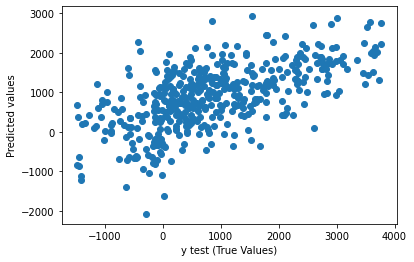

In [47]:
plt.scatter(y_test,predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

In [48]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE  757.1608832009081
MSE  873589.5505324369
RMSE  934.6601256780118


In [49]:
metrics.explained_variance_score(y_test,predictions)

0.3694158470260557

## **Random Forest Regressor**

In [50]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X, y) 


RandomForestRegressor(random_state=0)

In [51]:
predictions = rf.predict(X_test)


Text(0, 0.5, 'Predicted values')

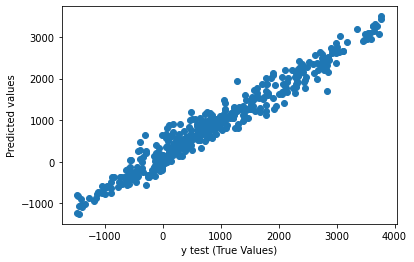

In [52]:
plt.scatter(y_test,predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

In [53]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE  233.40850777777771
MSE  90984.91340194686
RMSE  301.6370557506933


In [54]:
metrics.explained_variance_score(y_test,predictions)

0.9343349079403704

## **Lasso**

In [55]:
clf = Lasso()
clf.fit(X,y)

Lasso()

In [56]:
predictions = clf.predict(X_test)

Text(0, 0.5, 'Predicted values')

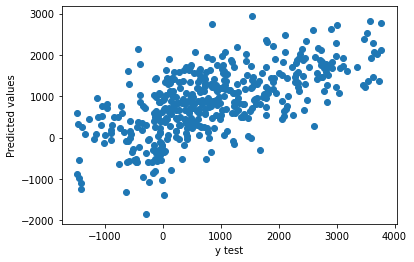

In [57]:
plt.scatter(y_test,predictions)
plt.xlabel('y test')
plt.ylabel('Predicted values')

In [58]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE  731.7115390578078
MSE  818711.5166199266
RMSE  904.8267881865162


In [59]:
metrics.explained_variance_score(y_test,predictions)

0.4087806303342061

### Part B

In [63]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data.isnull().sum()
test_data['F5'] = pd.factorize(test_data['F5'])[0]
test_data['F12'] = pd.factorize(test_data['F12'])[0]
test_data['F21'] = pd.factorize(test_data['F21'])[0]
test_data['F28'] = pd.factorize(test_data['F28'])[0]


test_data['F5'] = test_data['F5'].astype(float)
test_data['F12'] = test_data['F12'].astype(float)
test_data['F21'] = test_data['F21'].astype(float)
test_data['F28'] = test_data['F28'].astype(float)

test_data.info()





predicted =rf.predict(test_data)
 # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [64]:
test_data.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
F23    0
F24    0
F25    0
F26    0
F27    0
F28    0
F29    0
F30    0
F31    0
F32    0
F33    0
F34    0
F35    0
F36    0
dtype: int64

In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [66]:
test_data['F23'] = test_data['F23'].astype(float)
test_data['F27'] = test_data['F27'].astype(float)
test_data['F29'] = pd.factorize(test_data['F29'])[0]
test_data['F32'] = pd.factorize(test_data['F32'])[0]
test_data['F29'] = test_data['F29'].astype(float)
test_data['F32'] = test_data['F32'].astype(float)





In [67]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  